In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import us
import copy
import pickle
import tqdm.auto as tqdm
import geopandas as gpd
import numpy as np
import pandas as pd
from shapefiles import shapefiles, school_district_shapefiles, ce_to_name
from relationship import full_relationships, create_relationships
from stats_for_shapefile import compute_statistics_for_shapefile, compute_summed_shapefile_all_keys, sum_keys
from create_website import (
    full_shapefile,
    shapefile_without_ordinals,
    add_ordinals,
    get_statistic_categories,
    create_page_jsons,
    internal_statistic_names,
    statistic_internal_to_display_name,
)
from election_data import with_election_results

import matplotlib.pyplot as plt
from collections import Counter

/home/kavi/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
from output_geometry import produce_geometry_json

In [4]:
# f = shapefile_without_ordinals()

In [5]:
from urbanstats.special_cases.russia_geo import get_simplified_country, row_for_country

In [6]:
rr = row_for_country("Russian Federation")

In [7]:
g = gpd.GeoDataFrame([rr])

In [8]:
polys = gpd.GeoSeries(g.geometry.apply(lambda g: g.geoms).explode())

In [9]:
len(polys)

10584

In [ ]:
rr.geometry = (
    polys[polys.set_crs("epsg:4326").to_crs({"proj": "cea"}).area > 10_000**2]
    .buffer(0)
    .unary_union
)

In [ ]:
# r = russia_row_original()

In [ ]:
# import copy
# r = copy.deepcopy(r)
# r.geometry = r.geometry.simplify(5/120)

In [ ]:
for x in ["Russian Federation", "Japan", "Chile", "Norway", "Canada"]:
    print(x)
    

In [ ]:
! du -sh *.gz

In [ ]:
get_simplified_country("Norway")

In [50]:

g = g

# g[g.to_crs({"proj": "cea"}).area > 10 * 1000 * 1000].dissolve("longname")

In [74]:
rus = polys[polys.set_crs("epsg:4326").to_crs({"proj": "cea"}).area > 10 * 1000 ** 2].buffer(0).unary_union

In [70]:
rus

In [71]:
with open("temp.geojson", "w") as f:
    f.write(gpd.GeoDataFrame([r]).to_json())

In [32]:
from shapefiles import countries

In [33]:
c = countries()

In [36]:
c[:10].overlay(c[:10])

KeyboardInterrupt: 

In [25]:
len(pickle.dumps(c.geometry[11].simplify(1/120 * 0.1))) / 1e6

1.898133

In [29]:
with open("temp.geojson", "w") as f:
    f.write(c[c.COUNTRY == "Australia"].to_json())

In [ ]:
for _, x in c.iterrows():
    print(x.COUNTRY)
    x.geometry.buffer(1/120 * 0.01)
#     x.buffer(1/120)

Andorra
United Arab Emirates
Afghanistan
Antigua and Barbuda
Anguilla
Albania
Armenia
Angola
Antarctica
Argentina
Austria
Australia
Aruba
Azerbaijan
Bosnia and Herzegovina
Barbados
Bangladesh
Belgium
Burkina Faso
Bulgaria
Bahrain
Burundi
Benin
Bermuda
Brunei Darussalam
Bolivia
Brazil


In [12]:
c.iloc[94:95].explode(index_parts=True).buffer(1/120 * 0.1).buffer(-1/120 * 0.1)

/home/kavi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/home/kavi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

In [4]:
# aa = gpd.read_file(shapefiles["countries"].path)

In [5]:
# aa

In [6]:
# a = shapefiles["countries"].load_file()

In [ ]:
p = shapefiles["countries"].load_file()

/home/kavi/census-centroid-blocks/population_density/shapefiles.py:179: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data = data.buffer(1/120 * 0.1)


In [ ]:
p[p.longname == "India"].iloc[0].geometry

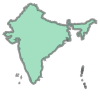

In [19]:
p[p.longname == "India"].iloc[0].geometry

In [14]:
p

geometry   FID  OBJECTID  \
0     MULTIPOLYGON (((44.88742 12.72837, 44.88445 12...  5768      5768   
1     MULTIPOLYGON (((56.08979 24.74185, 56.08153 24...  5357      5357   
2     POLYGON ((44.04878 16.65369, 44.09526 16.65390...  5771      5771   
3     MULTIPOLYGON (((-174.95497 -21.47492, -174.956...  5008      5008   
4     MULTIPOLYGON (((15.12767 -26.83317, 15.12833 -...  3012      3012   
...                                                 ...   ...       ...   
3681  POLYGON ((37.59076 35.34591, 37.65437 35.34988...  4810      4810   
3682  POLYGON ((48.08922 29.27319, 48.08493 29.26844...  2369      2369   
3683  POLYGON ((39.12918 35.07660, 39.16157 35.06287...  4811      4811   
3684  POLYGON ((44.78345 27.52665, 44.77032 27.51431...  4156      4156   
3685  POLYGON ((35.91519 32.32206, 35.91136 32.32023...  2263      2263   

         NAME               COUNTRY ISO_CODE ISO_CC ISO_SUB    ADMINTYPE  \
0       'Adan                 Yemen     YEAD     YE      AD  Governorate   
1      'Ajmān  United Arab Emirates     AEAJ     AE      AJ      Emirate   
2      'Amrān                 Yemen     YEAM     YE      AM  Governorate   
3        'Eua                 Tonga     TO01     TO      01     District   
4     //Karas               Namibia     NAKA     NA      KA       Region   
...       ...                   ...      ...    ...     ...          ...   
3681    Ḩamāh                 Syria     SYHM     SY      HM  Governorate   
3682  Ḩawallī                Kuwait     KWHA     KW      HA  Governorate   
3683     Ḩimş                 Syria     SYHI     SY      HI  Governorate   
3684    Ḩā'il          Saudi Arabia     SA06     SA      06       Region   
3685   ‘Ajlūn                Jordan     JOAJ     JO      AJ  Governorate   

      DISPUTED  ... AUTONOMOUS            COUNTRYAFF CONTINENT  \
0            0  ...          0                 Yemen      Asia   
1            0  ...          0  United Arab Emirates      Asia   
2            0  ...          0                 Yemen      Asia   
3            0  ...          0                 Tonga   Oceania   
4            0  ...          0               Namibia    Africa   
...        ...  ...        ...                   ...       ...   
3681         0  ...          0  Syrian Arab Republic      Asia   
3682         0  ...          0                Kuwait      Asia   
3683         0  ...          0  Syrian Arab Republic      Asia   
3684         0  ...          0          Saudi Arabia      Asia   
3685         0  ...          0                Jordan      Asia   

              LAND_TYPE LAND_RANK  Shape_Leng  Shape_Area    Shape__Are  \
0     Very small island         1    0.072068    0.000063  8.029335e+05   
1          Primary land         5    1.439798    0.024661  3.376756e+08   
2          Primary land         5    4.303246    0.667796  8.616486e+09   
3          Small island         2    0.450672    0.008116  1.080032e+08   
4     Very small island         1    0.245803    0.000153  2.126246e+06   
...                 ...       ...         ...         ...           ...   
3681       Primary land         5    5.507551    0.690849  1.047767e+10   
3682       Primary land         5    0.468518    0.007747  1.100838e+08   
3683       Primary land         5    9.831167    4.169063  6.253377e+10   
3684       Primary land         5   16.960578   11.058652  1.543108e+11   
3685       Primary land         5    0.915449    0.038517  5.644924e+08   

        Shape__Len                      fullname  
0     8.147237e+03                  'Adan, Yemen  
1     1.668671e+05  'Ajmān, United Arab Emirates  
2     4.896173e+05                 'Amrān, Yemen  
3     5.283850e+04                   'Eua, Tonga  
4     2.944253e+04              //Karas, Namibia  
...            ...                           ...  
3681  6.663494e+05   Ḩamāh, Syrian Arab Republic  
3682  5.520024e+04               Ḩawallī, Kuwait  
3683  1.183394e+06    Ḩimş, Syrian Arab Republic  
3684  1.970927e+06           

In [7]:
from create_website import american_shapefile, international_shapefile, shapefile_without_ordinals
from urbanstats.data.gpw import compute_gpw_data_for_shapefile_table


In [9]:
f = full_shapefile()

computing statistics:   0%|          | 0/22 [00:00<?, ?it/s]

adding ordinals:   0%|          | 0/22 [00:00<?, ?it/s]

/home/kavi/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [11]:
f[f.longname.apply(lambda x: ", Lux" in x)]

longname            shortname  population  \
123935                Wiltz, Luxembourg                Wiltz         NaN   
123837              Vianden, Luxembourg              Vianden         NaN   
123121               Remich, Luxembourg               Remich         NaN   
123116              Redange, Luxembourg              Redange         NaN   
122472               Mersch, Luxembourg               Mersch         NaN   
122314           Luxembourg, Luxembourg           Luxembourg         NaN   
121621         Grevenmacher, Luxembourg         Grevenmacher         NaN   
121486  Esch an der Alzette, Luxembourg  Esch an der Alzette         NaN   
121453           Echternach, Luxembourg           Echternach         NaN   
121378             Diekirch, Luxembourg             Diekirch         NaN   
121265             Clervaux, Luxembourg             Clervaux         NaN   
121136             Capellen, Luxembourg             Capellen         NaN   

        hispanic  white  black  native  asian  hawaiian_pi  ad_0.25  ...  \
123935       NaN    NaN    NaN     NaN    NaN          NaN      NaN  ...   
123837       NaN    NaN    NaN     NaN    NaN          NaN      NaN  ...   
123121       NaN    NaN    NaN     NaN    NaN          NaN      NaN  ...   
123116       NaN    NaN    NaN     NaN    NaN          NaN      NaN  ...   
122472       NaN    NaN    NaN     NaN    NaN          NaN      NaN  ...   
122314       NaN    NaN    NaN     NaN    NaN          NaN      NaN  ...   
121621       NaN    NaN    NaN     NaN    NaN          NaN      NaN  ...   
121486       NaN    NaN    NaN     NaN    NaN          NaN      NaN  ...   
121453       NaN    NaN    NaN     NaN    NaN          NaN      NaN  ...   
121378       NaN    NaN    NaN     NaN    NaN          NaN      NaN  ...   
121265       NaN    NaN    NaN     NaN    NaN          NaN      NaN  ...   
121136       NaN    NaN    NaN     NaN    NaN          NaN      NaN  ...   

        (insurance_coverage_none, overall_ordinal)  \
123935                                      159537   
123837                                      159433   
123121                                      158661   
123116                                      158656   
122472                                      157965   
122314                                      157796   
121621                                      157060   
121486                                      156902   
121453                                      156864   
121378                                      156786   
121265                                      156659   
121136                                      156522   

        (insurance_coverage_govt, overall_ordinal)  \
123935                                      159537   
123837                                      159433   
123121                                      158661   
123116                                      158656   
122472                                      157965   
122314                                      157796   
121621                                      157060   
121486                                      156902   
121453                                      156864   
121378                                      156786   
121265                                      156659   
121136                                      156522   

        (insurance_coverage_private, overall_ordinal)  \
123935                                         159537   
123837                                         159433   
123121                                         158661   
123116                                         158656   
122472                                         157965   
122314                                         157796   
121621                                         157060   
121486                                         156902   
121453                                         156864   
121378                                         156786   
121265              

In [78]:
usa = american_shapefile()
intl = international_shapefile()

computing statistics:   0%|          | 0/22 [00:00<?, ?it/s]

In [82]:
intl[intl.area < 5]

gpw_population  gpw_pw_density_1  gpw_pw_density_2  gpw_pw_density_4  \
19       3999.489990       9763.227539       9407.933594       8119.445312   
289      1791.185059        598.900696        356.158356        167.566513   
405       642.206482        216.226578        169.808701        113.868141   
421       342.115601        196.965195        158.860260         92.774117   
426       581.369568        165.204437        215.332489        190.248108   
...              ...               ...               ...               ...   
3448        0.000000               NaN               NaN               NaN   
3544      262.120209        265.439667        298.131927        200.095169   
3592        0.000000               NaN               NaN               NaN   
3762     1114.254395        370.530273        341.137939        168.623123   
3837       33.690109          9.064155          7.403187          7.437174   

          area  perimeter  compactness  gpw_aw_density  \
19    0.497547   3.075330     0.661090     8038.419026   
289   0.986560   4.369102     0.649455     1815.587172   
405   1.672504   6.775916     0.457763      383.978989   
421   1.086869   5.652789     0.427427      314.771737   
426   3.337437   8.628941     0.563259      174.196439   
...        ...        ...          ...             ...   
3448  0.001255   0.138015     0.827997        0.000000   
3544  0.830058   5.579987     0.335005      315.785438   
3592  0.011819   0.973194     0.156813        0.000000   
3762  1.531979   5.173509     0.719271      727.329916   
3837  2.079091  18.367149     0.077446       16.204252   

                           longname                      shortname  \
19    Holy See (Vatican City State)  Holy See (Vatican City State)   
289                     Aiwo, Nauru                           Aiwo   
405                   Anabar, Nauru                         Anabar   
421                   Anetan, Nauru                         Anetan   
426                  Anibare, Nauru                        Anibare   
...                             ...                            ...   
3448       Timor-Leste, Timor-Leste                    Timor-Leste   
3544                   Uaboe, Nauru                          Uaboe   
3592                 Valetta, Malta                        Valetta   
3762                   Yaren, Nauru                          Yaren   
3837                Ípeiros, Greece                        Ípeiros   

                    type        source  
19               Country  OpenDataSoft  
289   Subnational Region          ESRI  
405   Subnational Region          ESRI  
421   Subnational Region          ESRI  
426   Subnational Region          ESRI  
...                  ...           ...  
3448  Subnational Region          ESRI  
3544  Subnational Region          ESRI  
3592  Subnational Region          ESRI  
3762  Subnational Region          ESRI  
3837  Subnational Region          ESRI  

[71 rows x 12 columns]

In [83]:
wo_ord = shapefile_without_ordinals()

computing statistics:   0%|          | 0/22 [00:00<?, ?it/s]

0        2117522.0
1         886667.0
2       39531994.0
3        4505917.0
4        5024186.0
           ...    
3808           NaN
3809           NaN
3810           NaN
3811           NaN
3812           NaN
Name: population, Length: 159727, dtype: float64

In [75]:
u = wo_ord[wo_ord.type == "Country"]
ao = add_ordinals(u, overall_ordinal=False)
ao

/home/kavi/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


longname   shortname  population  hispanic  white  black  native  \
0        Uganda      Uganda         NaN       NaN    NaN    NaN     NaN   
1    Uzbekistan  Uzbekistan         NaN       NaN    NaN    NaN     NaN   
2       Ireland     Ireland         NaN       NaN    NaN    NaN     NaN   
3       Eritrea     Eritrea         NaN       NaN    NaN    NaN     NaN   
4      Mongolia    Mongolia         NaN       NaN    NaN    NaN     NaN   
..          ...         ...         ...       ...    ...    ...     ...   
212    Slovakia    Slovakia         NaN       NaN    NaN    NaN     NaN   
213        Mali        Mali         NaN       NaN    NaN    NaN     NaN   
214     Armenia     Armenia         NaN       NaN    NaN    NaN     NaN   
215     Albania     Albania         NaN       NaN    NaN    NaN     NaN   
216   Gibraltar   Gibraltar         NaN       NaN    NaN    NaN     NaN   

     asian  hawaiian_pi  ad_0.25  ...  (ad_0.25, percentile_by_population)  \
0      NaN          NaN      NaN  ...                             0.044345   
1      NaN          NaN      NaN  ...                             0.024522   
2      NaN          NaN      NaN  ...                             0.390058   
3      NaN          NaN      NaN  ...                             0.667448   
4      NaN          NaN      NaN  ...                             0.307000   
..     ...          ...      ...  ...                                  ...   
212    NaN          NaN      NaN  ...                             0.160080   
213    NaN          NaN      NaN  ...                             0.326588   
214    NaN          NaN      NaN  ...                             0.979510   
215    NaN          NaN      NaN  ...                             0.995776   
216    NaN          NaN      NaN  ...                             0.629139   

     (ad_0.5, ordinal)  (ad_0.5, total)  (ad_0.5, percentile_by_population)  \
0                  203              217                            0.044345   
1                  208              217                            0.024522   
2                   95              217                            0.390058   
3                   61              217                            0.667448   
4                  131              217                            0.307000   
..                 ...              ...                                 ...   
212                178              217                            0.160080   
213                121              217                            0.326588   
214                 10              217                            0.979510   
215                  2              217                            0.995776   
216                 76              217                            0.629139   

     (ad_2, ordinal)  (ad_2, total)  (ad_2, percentile_by_population)  \
0                203            217                          0.044345   
1                208            217                          0.024522   
2                 95            217                          0.390058   
3                 61            217                          0.667448   
4                131            217                          0.307000   
..               ...            ...                               ...   
212              178            217                          0.160080   
213              121            217                          0.326588   
214               10            217                          0.979510   
215                2            217                          0.995776   
216               76            217                          0.629139   

     (ad_4, ordinal)  (ad_4, total)  (ad_4, percentile_by_population)  
0                203            217                          0.044345  
1                208            217                          0.024522  
2                 95            217                          0.390058  
3                 61            217                    

In [72]:
u.gpw_population.sum()

7841103000.0

In [77]:
ao["gpw_population", "percentile_by_population"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
212   NaN
213   NaN
214   NaN
215   NaN
216   NaN
Name: (gpw_population, percentile_by_population), Length: 217, dtype: float64

In [65]:
u.gpw_population

0      4.232098e+07
1      3.337482e+07
2      5.330824e+06
3      4.184848e+06
4      3.174617e+06
           ...     
212    5.450328e+06
213    2.329488e+07
214    2.807070e+06
215    2.718524e+06
216    3.216313e+04
Name: gpw_population, Length: 217, dtype: float32

In [44]:
[x.meta['type'] for x in shapefiles.values()]

['State',
 'County',
 'MSA',
 'CSA',
 'Urban Area',
 'ZIP',
 'CCD',
 'City',
 'Neighborhood',
 'Congressional District',
 'State House District',
 'State Senate District',
 'Historical Congressional District',
 'Native Area',
 'Native Statistical Area',
 'Native Subdivision',
 'School District',
 'Judicial District',
 'Judicial Circuit',
 'Media Market',
 'Country',
 'Subnational Region']

In [14]:
compute_gpw_data_for_shapefile_table(shapefiles["subnational_regions"])

gpw_population  gpw_pw_density_1  gpw_pw_density_2  gpw_pw_density_4  \
0       8.734913e+05       3600.016602       3572.468506       2764.256348   
1       4.004168e+05       1319.378418       1435.160156       1310.824951   
2       1.362904e+06        293.782257        323.179840        321.437744   
3       4.270175e+03         37.143398         37.815498         31.093292   
4       8.490495e+04        714.116577        443.728210        165.383682   
...              ...               ...               ...               ...   
3681    1.702906e+06        420.716827        456.491089        463.202362   
3682    7.674444e+05       8753.320312       9087.806641       8058.169922   
3683    2.218492e+06        894.747498        955.701599        936.823547   
3684    8.347931e+05          8.778664          9.679357          9.925999   
3685    1.532970e+05        380.173126        422.836182        431.939362   

               area    perimeter  compactness  gpw_aw_density  \
0        719.578111   295.608096     0.103480     1213.893668   
1        275.392686   154.263850     0.145423     1453.984920   
2       7902.736785   467.536866     0.454314      172.459717   
3         93.192758    47.549811     0.517958       45.820887   
4     161300.027101  2239.505113     0.404148        0.526379   
...             ...          ...          ...             ...   
3681    6979.208859   571.552079     0.268475      243.997068   
3682      83.417654    49.518042     0.427505     9200.023482   
3683   42578.642296  1024.074473     0.510198       52.103411   
3684  121235.488350  1814.964735     0.462491        6.885715   
3685     402.406936    94.985491     0.560481      380.950193   

                          longname shortname  
0                     'Adan, Yemen     'Adan  
1     'Ajmān, United Arab Emirates    'Ajmān  
2                    'Amrān, Yemen    'Amrān  
3                      'Eua, Tonga      'Eua  
4                 //Karas, Namibia   //Karas  
...                            ...       ...  
3681   Ḩamāh, Syrian Arab Republic     Ḩamāh  
3682               Ḩawallī, Kuwait   Ḩawallī  
3683    Ḩimş, Syrian Arab Republic      Ḩimş  
3684           Ḩā'il, Saudi Arabia     Ḩā'il  
3685                ‘Ajlūn, Jordan    ‘Ajlūn  

[3686 rows x 10 columns]

In [89]:
ya = gpd.read_file(shapefiles["countries"].path)

In [87]:
type(pycountry.countries.get(alpha_3="None"))

NoneType

In [93]:
y = shapefiles["countries"].load_file()

In [94]:
y

shortname    longname                                           geometry
0        Uganda      Uganda  POLYGON ((33.92110 -1.00194, 33.92027 -1.00111...
1    Uzbekistan  Uzbekistan  POLYGON ((70.97081 42.25467, 70.98054 42.26205...
2       Ireland     Ireland  MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53...
3       Eritrea     Eritrea  MULTIPOLYGON (((40.13583 15.75250, 40.12861 15...
5      Mongolia    Mongolia  POLYGON ((116.71138 49.83047, 116.64665 49.738...
..          ...         ...                                                ...
251    Slovakia    Slovakia  POLYGON ((22.55805 49.07944, 22.55166 49.03943...
252        Mali        Mali  POLYGON ((-4.80611 25.00027, -4.52528 24.82500...
253     Armenia     Armenia  POLYGON ((46.54038 38.87559, 46.51639 38.87804...
254     Albania     Albania  POLYGON ((20.07142 42.56091, 20.10208 42.53347...
255   Gibraltar   Gibraltar  POLYGON ((-5.35580 36.16331, -5.33451 36.16256...

[236 rows x 3 columns]

In [ ]:
len(set(y.longname)), y.shape

In [30]:
{k : v for k, v in Counter(a.shortname).items() if v > 6}

{'Nunavut, Canada': 9,
 'French Southern Territories, French Southern Territories': 7,
 'Palawan, Philippines': 9,
 "Sakhalinskaya oblast', Russian Federation": 7,
 'Outer Islands, Seychelles': 10}

In [22]:
b = gpd.read_file(shapefiles["subnational_regions"].path)

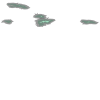

In [35]:
b[b.NAME == "Nunavut"].geometry.iloc[3]

In [4]:
# sh = compute_statistics_for_shapefile()

In [5]:
# from stats_for_shapefile import block_level_data, process_summed_statistics
# from create_website import add_margins

In [6]:
# fs = full_shapefile()

In [7]:
from urbanstats.data.gpw import load_full
from census_blocks import all_densities_gpd

In [8]:
# glo = load_full()
# usa = all_densities_gpd()

In [9]:
# row = usa.iloc[5]

In [10]:
from urbanstats.geometry.ellipse import Ellipse
from urbanstats.data.gpw import *
from urbanstats.features.within_distance import xy_to_radius

In [11]:
# y, x = row.geometry.y, row.geometry.x

In [12]:
# # ry, rx = ell.lat_radius, ell.lon_radius
# # y = 90 -> i = 0; y = 0 -> i = adjust * 90
# i = (90 - y) * 3600 / 30
# j = (180 + x) * 3600 / 30

In [13]:
# by_lat = np.nansum(glo, axis=1)
# by_lon = np.nansum(glo, axis=0)
# plt.figure(dpi=200, facecolor="black", figsize=(5, 5))
# plt.gca().set_facecolor("black")
# kwargs = dict(color="white", lw=0.1)
# scalar = 1 / by_lat.max() * 360
# lats = lat_from_row_idx(np.arange(by_lat.shape[0]))
# plt.plot(by_lat * scalar - 180, lats, **kwargs)
# plt.plot(lon_from_col_idx(np.arange(by_lon.shape[0])), by_lon * scalar + 90, **kwargs)
# plt.axis("equal")
# plt.show()

In [14]:
# dens_2 = compute_circle_density_per_cell(2)

In [15]:
dens_4 = compute_circle_density_per_cell(4)

In [16]:
# shape = shapefiles["states"].load_file().set_index("longname").loc["California, USA"].geometry

In [17]:
# rows, cols = lattice_cells_contained(shape)

In [18]:
# np.nansum(glo[rows, cols]) / 1e6

In [19]:
# np.nansum(dens_2[rows, cols] * glo[rows, cols]) / np.nansum(glo[rows, cols])

In [20]:
# s = gpd.read_file("named_region_shapefiles/World_Administrative_Divisions.zip")

In [21]:
# x = gpd.read_file(shapefiles["subnational_regions"].path)

In [22]:
# x[x["COUNTRY"].apply(lambda x: x is None)]

In [23]:
# s = shapefiles["subnational_regions"].load_file()

In [24]:
# s

In [7]:
# x = np.concatenate(np.concatenate(x, axis=1), axis=1)

In [67]:
chunk = 100
u = glo
u = np.nansum(u.reshape(u.shape[0] // chunk, chunk, u.shape[1]), 1)
u = np.nansum(u.reshape(u.shape[0], u.shape[1] // chunk, chunk), -1)

(-0.5, 431.5, 215.5, -0.5)

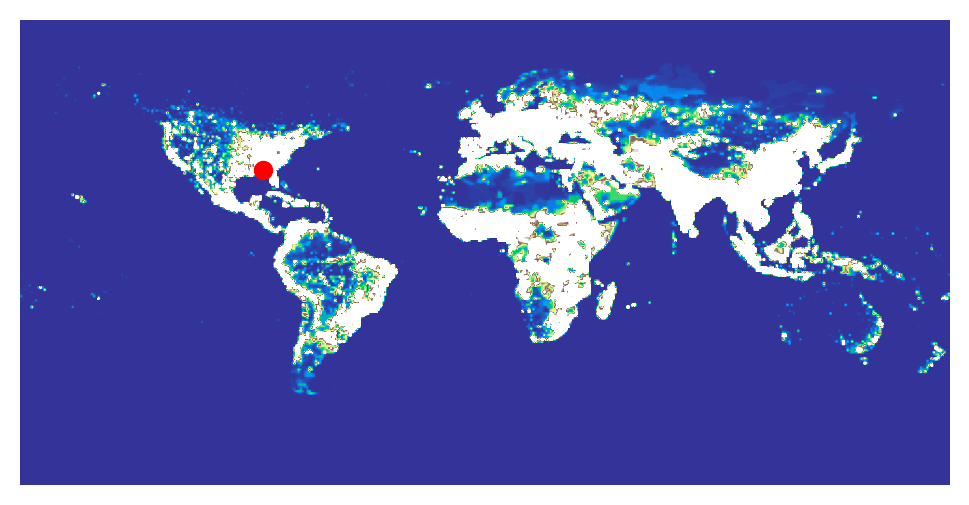

In [70]:
plt.figure(dpi=200)
plt.imshow(u, cmap="terrain")
plt.clim(0, 1e5)
plt.scatter([j/chunk], [i/chunk], color="red")
plt.axis("off")

In [27]:
(np.nan_to_num(x["data"][:], 0) != 0).mean()

0.10681538065843621

In [46]:
len(pickle.dumps(x)) / 1e9

3.73248016

/home/kavi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


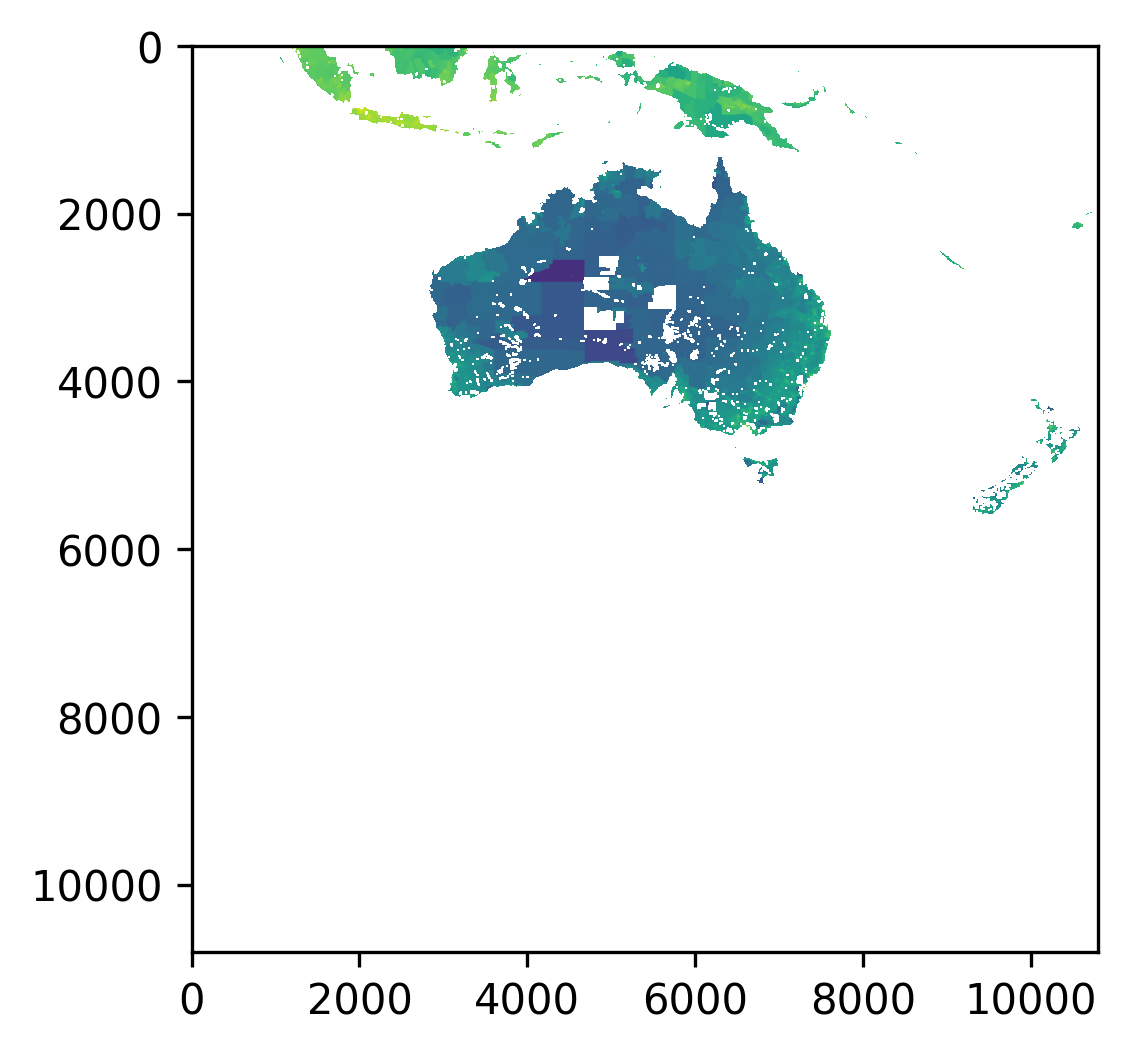

In [20]:
plt.figure(dpi=300)
plt.imshow(np.log(x["data"]))

In [88]:
bluewhite_zip = fs[(fs.type == "School District") & (fs.white > 0.7) & (fs[ ('2020 Presidential Election', 'margin')] > 0.75)]

In [89]:
"; ".join(list(bluewhite_zip.longname))

'Portland School District 1J, Oregon, USA; Burlington School District, Vermont, USA; Mill Valley Elementary School District, California, USA; Northampton School District, Massachusetts, USA; Ross Valley Elementary School District, California, USA; Dresden School District, New Hampshire, USA; Hanover School District, New Hampshire, USA; Montpelier Roxbury Unified Union School District, Vermont, USA; Yellow Springs Exempted Village School District, Ohio, USA; Lagunitas Elementary School District, California, USA; Provincetown School District, Massachusetts, USA; Norwich School District, Vermont, USA; Bolinas-Stinson Union Elementary School District, California, USA; Shutesbury School District, Massachusetts, USA; Pelham School District, Massachusetts, USA; Nicasio Elementary School District, California, USA; Canyon Elementary School District, California, USA'